# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab
sns.set()

# Loading the model predictions

In [2]:
models = ['MVLR', 'DNN', 'LSTM', 'GRU', 'CNN'] # specify the model names

dfs = []
for model in models:
    df = pd.read_csv('models\\'+model+'_predictions.csv', parse_dates=['datetime'])
    df = df.set_index(['datetime']) 
    df.columns = ['y_pred_'+model, 'y_true_'+model] # change columns to contain the model name
    dfs.append(df)

df = pd.concat(dfs) # Concatenate the list of DataFrames together to one DataFrame

FileNotFoundError: File b'models\\MVLR_predictions.csv' does not exist

# Processing the predictions

In [ ]:
df.head()

In [ ]:
# Calculate the difference between the y_true and y_pred per model
for model in models:
    df['y_diff_'+model] = df['y_true_'+model] - df['y_pred_'+model]
    df['y_diff_perc_'+model] = df['y_diff_'+model] / df['y_true_'+model] * 100
 
df.head()

In [ ]:
df = df.resample('D').sum()

# Plotting the predictions

# Predictions vs the real values

In [7]:
magnitude = 1

model = 'DNN'

y_true = df['y_true_DNN']

plt.figure(figsize=(20,10))

# TODO: Fix this
#df['zeros'] = 0
#plt.fill_between(y_true.index, y_true, df['zeros'], '.-', color='red')

for i, model in enumerate(models):
    colors = ['lightcoral', 'olivedrab', 'royalblue', 'mediumvioletred', 'black']
    markers = ['v', '*', 's', 'p', '^']
    
    color = colors[i]
    marker = markers[i]
    y_pred = df['y_pred_'+model]
    plt.plot(y_pred.index, y_pred, marker+'-', color=color, label=(model+' predictions'), alpha=1, markersize=9)


plt.plot(y_true.index, y_true, '.-.', color='firebrick', label='True values', alpha=1, linewidth=3, markersize=15, fillstyle='none')

plt.ylabel(r'gasPower $\cdot$ 10$^{-%s}$ [m$^3$/h]' % magnitude, fontsize=14)
plt.xlabel('datetime [-]', fontsize=14) #TODO: set x values as actual dates

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Model results', fontsize=14)

plt.tight_layout()

plt.legend(loc='upper left', borderaxespad=0, frameon=False, fontsize=14, markerscale=1)

plt.savefig('gaspower.png', dpi=1300)

NameError: name 'df' is not defined

# Difference between predictions and true values
Lower is better.

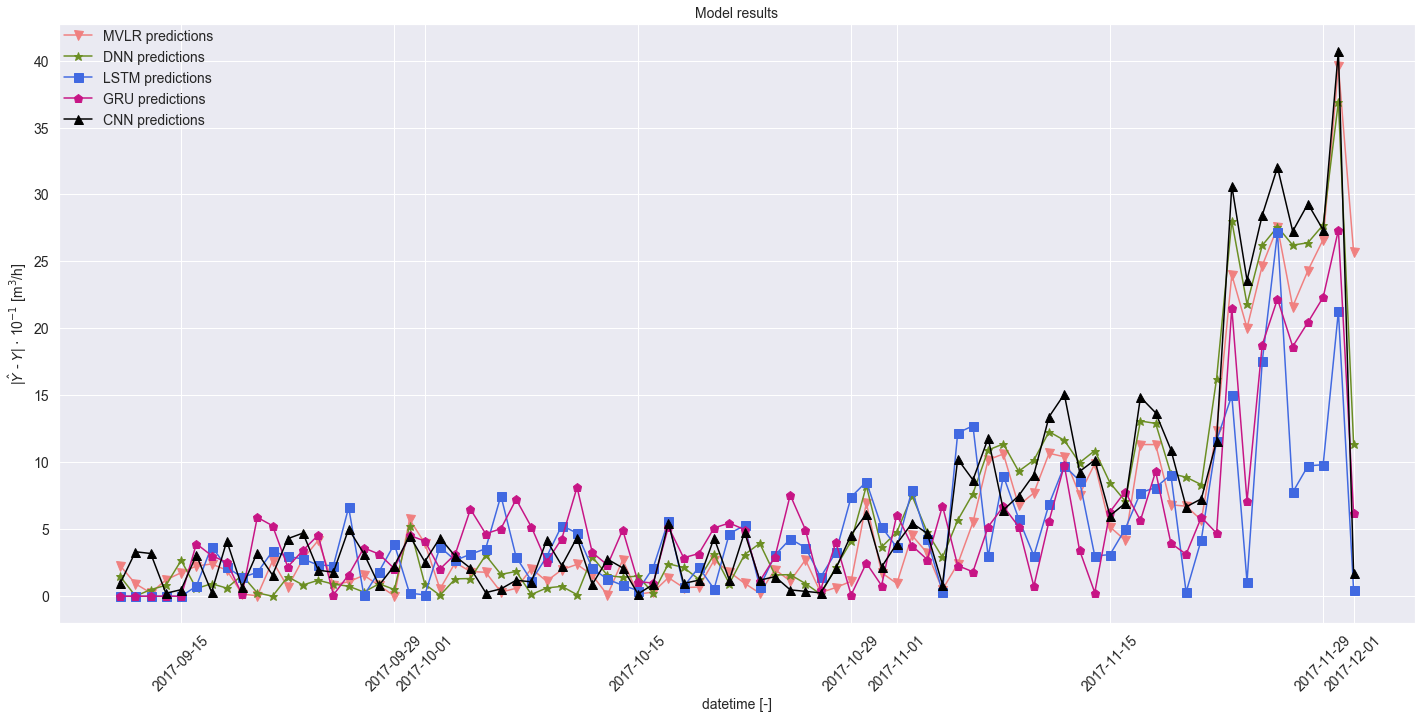

In [15]:
magnitude = 1

model = 'DNN'

#y_true = t['y_diff_DNN']

plt.figure(figsize=(20,10))

#plt.plot(y_true.index, y_true, '.-', color='red', label='True values', alpha=1, linewidth=1, markersize=15, fillstyle='none')

for i, model in enumerate(models):
    colors = ['lightcoral', 'olivedrab', 'royalblue', 'mediumvioletred', 'black']
    markers = ['v', '*', 's', 'p', '^']
    
    color = colors[i]
    marker = markers[i]
    y_pred = df['y_diff_'+model]
    plt.plot(y_pred.index, np.abs(y_pred), marker+'-', color=color, label=(model+' predictions'), alpha=1, markersize=9)


plt.ylabel(r'|$\hat{Y}$ - $Y$| $\cdot$ 10$^{-%s}$ [m$^3$/h]' % magnitude, fontsize=14)
plt.xlabel('datetime [-]', fontsize=14) #TODO: set x values as actual dates

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.tight_layout()

plt.title('Model results', fontsize=14)

plt.legend(loc='upper left', borderaxespad=0, frameon=False, fontsize=14, markerscale=1)

# Percentage difference

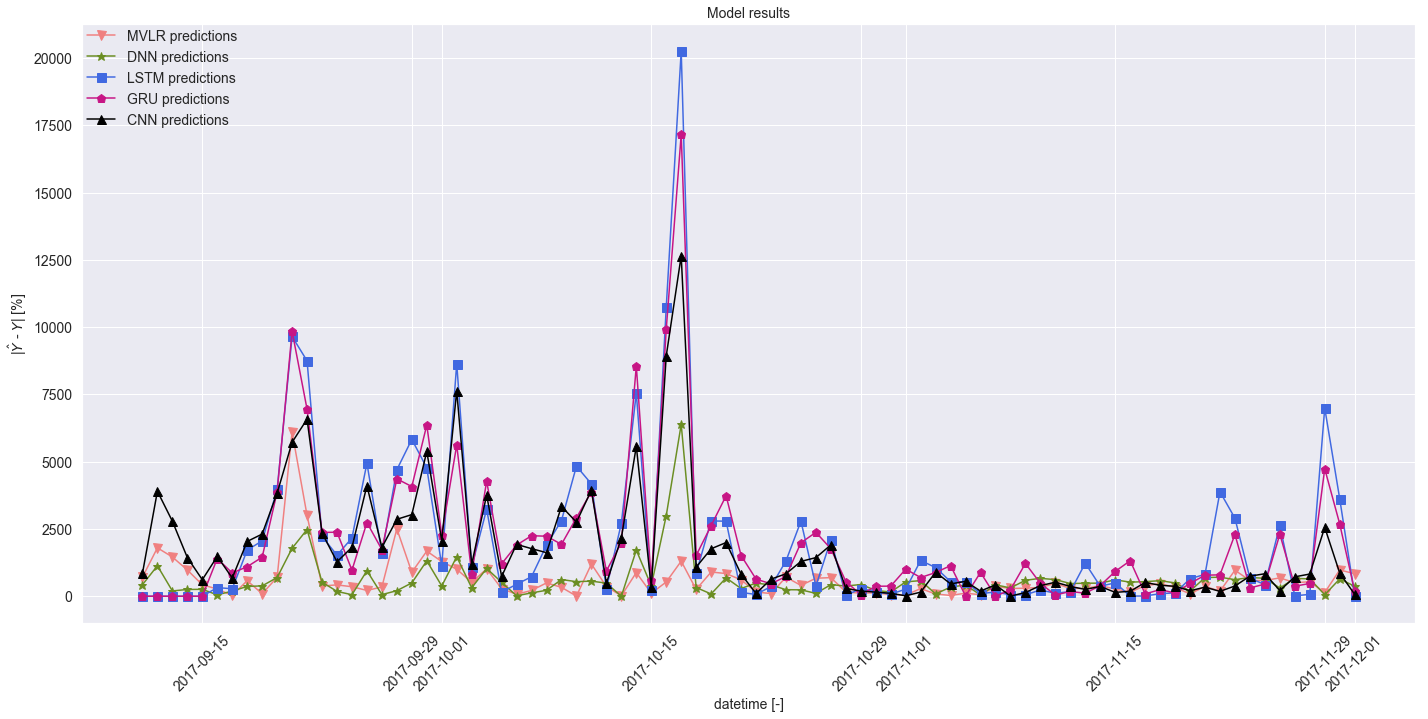

In [18]:
magnitude = 1

model = 'DNN'

#y_true = t['y_diff_DNN']

plt.figure(figsize=(20,10))

#plt.plot(y_true.index, y_true, '.-', color='red', label='True values', alpha=1, linewidth=1, markersize=15, fillstyle='none')

for i, model in enumerate(models):
    colors = ['lightcoral', 'olivedrab', 'royalblue', 'mediumvioletred', 'black']
    markers = ['v', '*', 's', 'p', '^']
    
    color = colors[i]
    marker = markers[i]
    y_pred = df['y_diff_perc_'+model]
    plt.plot(y_pred.index, np.abs(y_pred), marker+'-', color=color, label=(model+' predictions'), alpha=1, markersize=9)


plt.ylabel(r'|$\hat{Y}$ - $Y$| [%]', fontsize=14)
plt.xlabel('datetime [-]', fontsize=14) #TODO: set x values as actual dates

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.tight_layout()

plt.title('Model results', fontsize=14)

plt.legend(loc='upper left', borderaxespad=0, frameon=False, fontsize=14, markerscale=1)